## A. Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
sns.set(style='white', context='notebook', palette='deep')

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## B. Data Prepocessing

### B.1. Data preparation

In [2]:
# load data 
df= pd.read_csv('Titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Statistic Descriptive
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# checking duplicates value
print('shape : ',df.shape)
print('shape after drop duplicates : ',df.drop_duplicates().shape)

shape :  (891, 11)
shape after drop duplicates :  (891, 11)


In [5]:
# checking missing value
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
# Imputation of missing value

# Embarked column
df.Embarked.fillna('S', inplace=True)
# Age column
val= df.Age.mean()
df['Age']= df.Age.fillna(val)

In [7]:
# Dropping Cabin because of too many missing value
df.drop('Cabin',axis=1, inplace=True)

# Dropping ticket because of we don't need yet, perhaps it will use for feature engineering further
df.drop("Ticket",axis=1, inplace=True)

### B.2. Exploratory Data Analysis

#### Categorical Variables

Text(0.5,1,'survived/non survive')

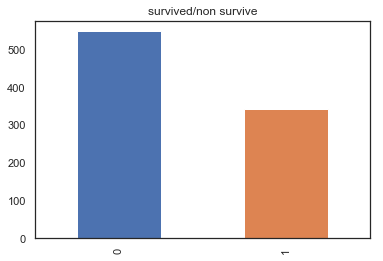

In [8]:
# Survival

df.Survived.value_counts().plot(kind='bar');
plt.title("survived/non survive")

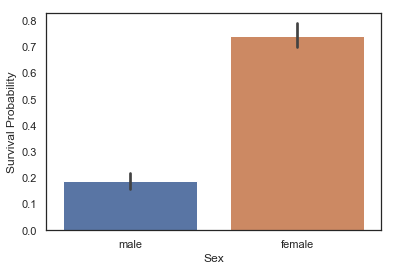

In [9]:
# Explore Sex vs Survived

g = sns.barplot(x="Sex",y="Survived",data=df)
g = g.set_ylabel("Survival Probability")

It is clearly obvious that Male have less chance to survive than Female.

So Sex, might play an important role in the prediction of the survival.

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


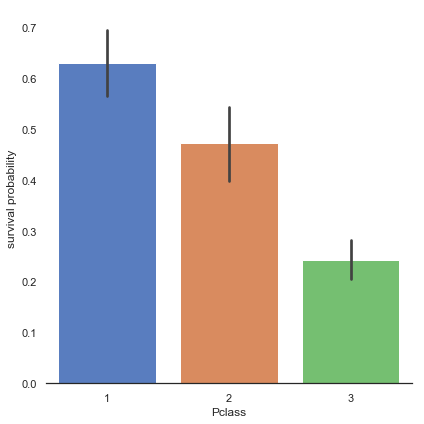

In [10]:
# Explore Pclass vs Survived

g = sns.factorplot(x="Pclass",y="Survived",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


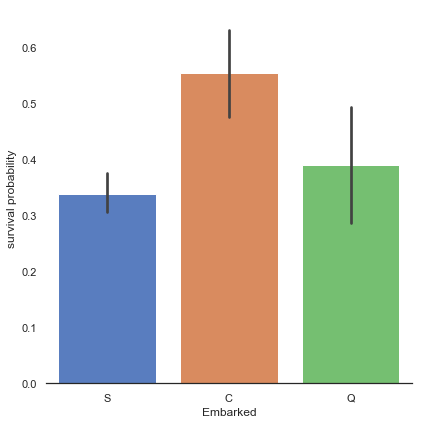

In [11]:
# Explore Embarked vs Survived 

g = sns.factorplot(x="Embarked", y="Survived",  data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passenger coming from Cherbourg (C) have more chance to survive.

#### Numerical Variables

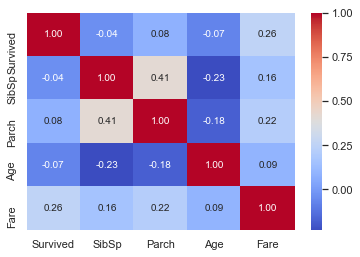

In [12]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


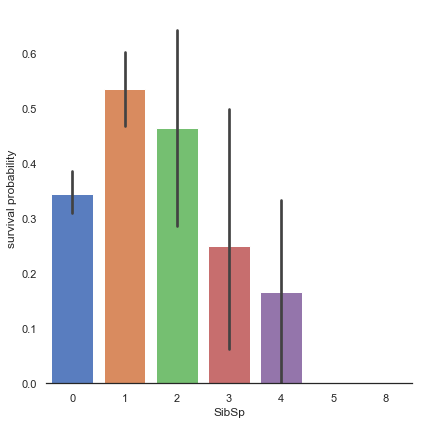

In [13]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive

Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


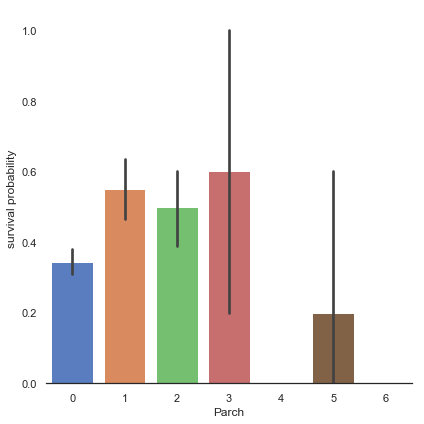

In [14]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).

Be carefull there is an important standard deviation in the survival of passengers with 3 parents/children

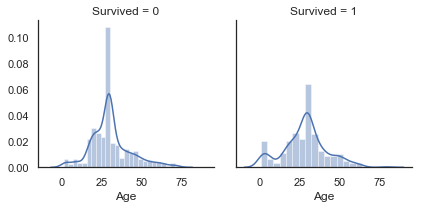

In [15]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.distplot, "Age")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

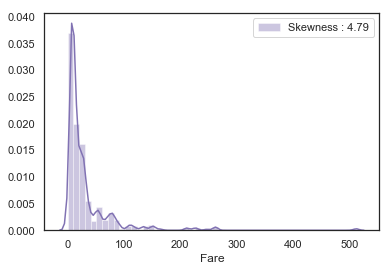

In [16]:
# Explore Fare distribution 
g = sns.distplot(df["Fare"], color="m", label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend(loc="best")

As we can see, Fare distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled.

In this case, it is better to transform it with the log function to reduce this skew.

### B.3. Feature Engineering

#### Name

In [17]:
df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [18]:
# Get Title from Name
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(df_title)
df["Title"].head()

PassengerId
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
Name: Title, dtype: object

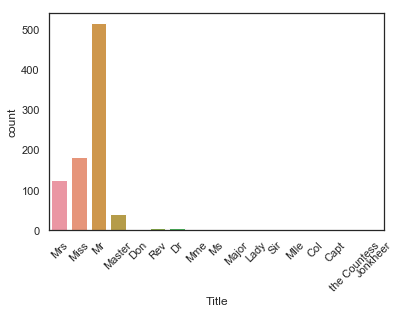

In [19]:
g = sns.countplot(x="Title",data=df)
g = plt.setp(g.get_xticklabels(), rotation=45) 

There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [20]:
df.dropna(inplace=True)

In [21]:
# Convert to categorical values Title 
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df["Title"] = df["Title"].astype(int)

C:\Users\nandafa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


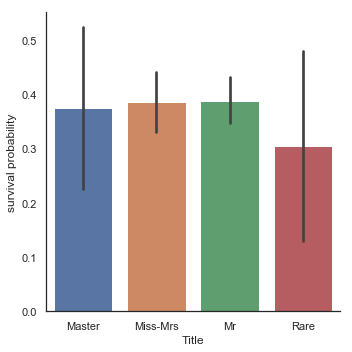

In [22]:
g = sns.factorplot(x="Title",y="Survived",data=df,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

"Women and children first"

It is interesting to note that passengers with rare title have more chance to survive.

In [23]:
# Drop Name variable
df.drop(labels = ["Name"], axis = 1, inplace = True)

In [24]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,1,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,1
4,1,1,35.0,1,0,53.1000,2,0,0,1
5,0,3,35.0,0,0,8.0500,2,1,0,1


## C. Modeling

I compared 5 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.
* Logistic Regression
* K-NN
* SVC
* Decision Tree
* Random Forest
* Gradient Boosting

#### C.1. Simple Modeling

In [25]:
## Separate train features and label 

df["Survived"] = df["Survived"].astype(int)

Y = df["Survived"]

X = df.drop(labels = ["Survived"],axis = 1)

In [26]:
# splitting train & test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,random_state=10)

In [27]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

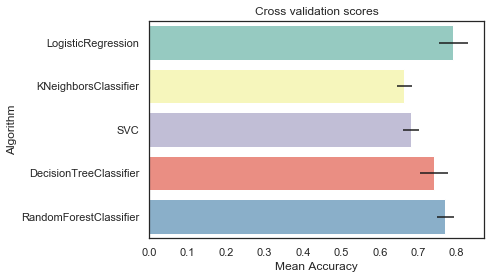

In [28]:
# Modeling step Test differents algorithms 
random_state = 10
classifiers = []

classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['LogisticRegression','KNeighborsClassifier',
                                                                                     'SVC','DecisionTreeClassifier','RandomForestClassifier']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [29]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.791617,0.037594,LogisticRegression
1,0.664224,0.019332,KNeighborsClassifier
2,0.680664,0.020368,SVC
3,0.740725,0.035571,DecisionTreeClassifier
4,0.770609,0.022643,RandomForestClassifier


Based on result above, Logistic Regression has highest accuracy than others

In [30]:
# checking overfitting
def eval(alg,kf,X_train, X_test):
    alg.fit(X_train,Y_train)
    print("R2 test: \n",alg.score(X_test,Y_test),'\n')
    print("R2 train: \n",alg.score(X_train,Y_train),'\n')
    
    cvr=cross_val_score(alg,X_train,Y_train,cv=kf)
    print("R2 cv : \n",cvr,'\n')
    print("R2 cv mean : \n",cvr.mean(),'\n')
    print("R2 cv std : \n",cvr.std(),'\n')

In [31]:
eval(LogisticRegression(random_state = random_state),5,X_train,X_test)

R2 test: 
 0.820627802690583 

R2 train: 
 0.7931034482758621 

R2 cv : 
 [0.73880597 0.8358209  0.7593985  0.79699248 0.82706767] 

R2 cv mean : 
 0.7916171024576366 

R2 cv std : 
 0.03759432664821934 



Logistic Regression seem generalize the prediction since the training and testing are close together.

#### C.2. Feature Importance

In [32]:
LR = LogisticRegression(random_state = random_state).fit(X_train,Y_train)
# get importance
importance = LR.coef_[0]

In [33]:
pd.DataFrame({'feature_importance':importance,
             'feature':X_train.columns}).sort_values(by='feature_importance', ascending=False)

,feature_importance,feature
5,0.137404,Title
7,0.121645,Embarked_Q
4,0.004106,Fare
1,-0.020478,Age
3,-0.055673,Parch
8,-0.357896,Embarked_S
2,-0.469034,SibSp
0,-0.731581,Pclass
6,-2.388720,Sex_male


You can see that the title feature has 13% importance, meaning that if the model is built using only these features, then the model score is 13%. Likewise for other features

For further analysis, we can do like : more feature engineering, and Parameter tunning